# Exercises 
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

## null hypotheses
- no it has be the same
- yes the redesign is fine, there is no difference
- no it is pulling the same amount of viewers

## alternative hypotheses
- there is a different latency then the last provider (more or less)
- there is a changed amount of users on the website (more or less)
- the ad is now pulling more customers, or getting less engagment

## true positive
- there is an decrease in latency after switch to new provider
- the website redesign was good, greater overall customer interaction
- the television ad is successfully bringing in more sales

## type 1 error
- the internet feels faster when in reality not
- the website initially had a gain then fell back down to the median
- sales have increased but when surveyed the customers did not list the ad as seen

## true negative
- there is no difference is latency or speed
- the website is too complicated
- the television ad doesn't bring in more attention or money

## type 2 error
- when testing the internet speed there is no difference but internet can now stream hd
- cannot tell on the website but revenew is returning higher
- the add is not referenced in purchase, purchases are increasing

# T-test Exercises
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import numpy as  np
# import env
import scipy
from math import sqrt

luckily there is  the first question to answer
- Office 1
- - 40 sales T/ mean of 90 days P/ 15 day std A
- Office 2
- - 50 sales T/ mean of 100 days P/ 20 day std A
- significance .05

In [ ]:
mean1=90
sdev1=15
nobs1=40
mean2=100
sdev2=20
nobs2=50

t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, nobs1, 
                                        mean2, sdev2, nobs2,
                                        equal_var = False)

In [ ]:
t

In [ ]:
p

In [ ]:
# α = 0.05

# tstat, pval = scipy.stats.ttest_ind(equal_var = False)

# t, p , α

- Load the mpg dataset and use it to answer the following questions:
- - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- - Are compact cars more fuel-efficient than the average car?
- - Do manual cars get better gas mileage than automatic cars?

In [ ]:
df = data('mpg')
df.head(100)

In [ ]:
df.info()

Only cars from either 1999 or 2008 exist on this list

In [ ]:
df.year.unique()

In [ ]:
df[df.year == 1999]

In [ ]:
df[df.year == 1999].count()

In [ ]:
df[df.year== 2008].count()

In [ ]:
df[df.year == 1999].hwy.mean()

In [ ]:
df[df.year == 1999].cty.mean()

In [ ]:
df[df.year == 1999].hwy.mean() + df[df.year == 1999].cty.mean() /2
#1999 average for 1999 mpg + hwy

In [ ]:
df[df.year== 2008].hwy.mean()

In [ ]:
df[df.year== 2008].cty.mean()

In [ ]:
df[df.year == 2008].hwy.mean() + df[df.year == 2008].cty.mean() /2
#2008 average city and highway mpg

In [ ]:
df.head()

In [ ]:
df[df["class"] == "compact"]

In [ ]:
df[df['class'] == "compact"].cty.mean()
#df[df.class == "compact"].hwy.mean() / 2

In [ ]:
df[df['class'] == "compact"].hwy.mean()

In [ ]:
df[df['class'] == "compact"].cty.mean() + df[df['class'] == "compact"].hwy.mean() / 2

In [ ]:
df[df['class'] == "compact"].cty.mean()

In [ ]:
#H_0: Average time to sell at office 1 == average time to sell  at office 1
#H_a: Average time to sell at office 1 != average time to sell  at office 2

In [ ]:
alpha = 0.05

In [ ]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1 , label = "Office")
plt.plot(x, y2, label = "Office 2")
plt.avxline(90, ls='t')
plt.avxline(100, ls=':', color = 'orange')

plt.legend()

In [ ]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var=False)
t, p

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    

In [ ]:
mpg = data('mpg')

In [ ]:
mpg.head()

In [ ]:
#H_0: There is no difference in fuel efficiency in cars from 2008 & 1999
#H_a: There is a diffrence in cars

In [ ]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis =1)
mpg.head()

In [ ]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [ ]:
fe_2008.hist()

In [ ]:
fe_1999.hist()

In [ ]:
fe_2008.count()

In [ ]:
fe_1999.count() # normality not issue

In [ ]:
#what about variance
fe_2008.var(), fe_1999.var()

In [ ]:
# Levens test
stats.levene(fe_2008, fe_1999)

In [ ]:
#calculate t & p
t, p = stats.ttest_ind(fe_2008,fe_1999)
t, p

In [ ]:
if p < alpha:
    print('reject null')
else:
    print('fail to reject null')

In [ ]:
fe_2008.mean(), fe_1999.mean()

In [ ]:
plt.hist([fe_1999, fe_2008], label=["1999 cars",'2008 cars'])

In [ ]:
#H_0: MPG for compact cars <= mpg for the average car
#H_a: MPG for compact cars > mpg for the average car

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [ ]:
pop_mean

In [ ]:
fe_compact.mean()

In [ ]:
fe_compact.hist()

In [ ]:
#calculate t & p
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

In [ ]:
if (p/2 < alpha) and t > 0 :
    print('Reject null')

In [ ]:
mpg.head()

In [ ]:
mpg.trans.value_counts()

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [ ]:
fe_auto.hist()

In [ ]:
fe_manual.hist()

In [ ]:
# llok at variance
fe_auto.var(), fe_manual.var()

In [ ]:
#levene test
stats.levene(fe_auto, fe_manual)

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

In [ ]:
fe_manual.mean(), fe_auto.mean()

In [ ]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Tranmission')

# Correlation Exercises



    Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
    Use the employees database.
        Is there a relationship between how long an employee has been with the company and their salary?
        Is there a relationship between how long an employee has been with the company and the number of titles they have had?
    Use the sleepstudy data. Is there a relationship between days and reaction time?


In [3]:
import telco.csv
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

ModuleNotFoundError: No module named 'telco'

In [4]:
import env
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [ ]:
df = pd.read_sql(
    'select * from customers join internet_service_types using (internet_service_type_id)',
    url
)
df = df[['tenure', 'monthly_charges', 'total_charges', 'internet_service_type', 'phone_service']]

In [ ]:
df

In [ ]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()
#thank the lord the ciriculumn covered the question

In [ ]:
df.info()

In [ ]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)
df.total_charges

In [ ]:
df.isna().mean()

In [ ]:
df.shape[0]

## Calculate Pearson Correlation Coefficient

In [ ]:
n = df.shape[0]
x = df.total_charges
y = df.tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

In [ ]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

In [ ]:
stats.pearsonr(df.tenure, df.monthly_charges)

In [ ]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            col='internet_service_type', 
            row='phone_service')

In [ ]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            hue='internet_service_type')

In [ ]:
def correlate_tenure_and_monthly_charges(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index=['r', 'p'])

df.groupby(['internet_service_type', 'phone_service']).apply(correlate_tenure_and_monthly_charges)

In [ ]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            hue='phone_service')

In [6]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

query = '''

 SELECT
     DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
     s.salary AS salary
 FROM employees e
 JOIN salaries s USING (emp_no)
 WHERE s.to_date > NOW()
 '''

employees_with_salaries = pd.read_sql(query,url)

In [7]:
employees_with_salaries.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [9]:
employees_with_salaries.shape

(240124, 2)

In [11]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.30646256131860783, 0.0)

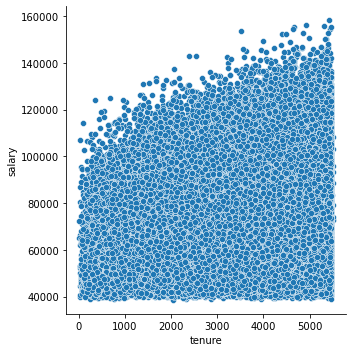

In [13]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure')

In [16]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [18]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


## follow along

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import pydataset
import matplotlib